# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [122]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
pd.set_option('display.max_columns', None)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [123]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df["title_length"] = df["title"].str.replace(" ", "").str.len()
df["title_length"]

0      22
1      12
2      19
3      13
4      11
       ..
974     7
975    22
976    39
977    11
978    10
Name: title_length, Length: 979, dtype: int64

In [124]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df["title_length"].mean()
mediana = df["title_length"].median()
moda = df["title_length"].mode().iloc[0]

print(media)
print(mediana)
print(moda)

13.682328907048008
12.0
10


In [125]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df["title_length"].max() - df["title_length"].min()
varianza = df["title_length"].var()
desviacion_estandar = df["title_length"].std()

print(rango)
print(varianza)
print(desviacion_estandar)

55
48.65665060336598
6.975431929519919


In [126]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = df["title_length"].skew()
curtosis = df["title_length"].kurt()

print(asimetria)
print(curtosis)

1.4969701378682314
3.749188508626576


La mayoria de datos se concentran a la izquierda.  
Curtosis positiva, más posibilidad de valores extremos.

In [127]:
# Imprime el título más corto y el título más largo según su longitud
titulo_mas_corto = df.loc[df["title_length"].idxmin(), "title"]
titulo_mas_largo = df.loc[df["title_length"].idxmax(), "title"]
print(titulo_mas_corto)
print(titulo_mas_largo)

M
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


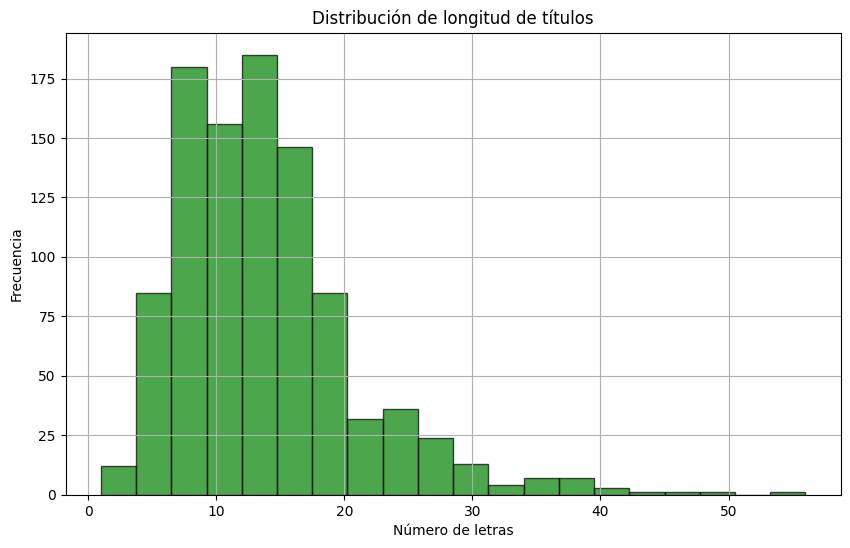

In [133]:
# grafica tus resultados
plt.figure(figsize=(10, 6))
plt.hist(df["title_length"], bins=20, edgecolor='black', alpha=0.7, color = "green")
plt.title("Distribución de longitud de títulos")
plt.xlabel("Número de letras")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [134]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
lista_de_5 = [22, 12, 19, 13, 7]

In [135]:
# Calcula la media de los 5 valores
media_5 = sum(lista_de_5)/len(lista_de_5)
print(media)

13.682328907048008


In [136]:
# Calcula las diferencias al cuadrado con respecto a la media
# Para cada valor de la lista se le resta la media, luego se eleva al cuadrado
suma_diferencias = sum((x - media_5)**2 for x in lista_de_5)
print(suma_diferencias)

141.20000000000002


In [137]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
varianza_manual = suma_diferencias / len(lista_de_5)
desviacion_manual = varianza_manual ** 0.5

print(f"Varianza: {varianza_manual}")
print(f"Desviación estándar: {desviacion_manual}")

Varianza: 28.240000000000002
Desviación estándar: 5.314132102234569
